In [222]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import re

[nltk_data] Error loading punkt: <urlopen error [Errno 8] nodename nor
[nltk_data]     servname provided, or not known>


In [223]:
# Data Preprocessing
path = "RottenTomatoes/DataSet/train.tsv"
df = pd.read_csv(path, sep="\t") 

# remove punctuation
df['Phrase'] = df['Phrase'].str.replace(r'[^\w\s]+', '')
# remove numbers
df['Phrase'] = df['Phrase'].str.replace(r'\d+', '')
# make it all lower case
df['Phrase'] = df['Phrase'].str.lower()
# remove non-asci characters
df.Phrase.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
#df['Phrase'] = df['Phrase'].str.split()

df['Tokenized_text'] = df['Phrase'].apply(word_tokenize) 

df['Sentiment']=df['Sentiment'].astype(int) #convert the star_rating column to int
df['NNLabels'] = df['Sentiment'].div(4)

df= df[df['Sentiment']!=2]

#df['label']=np.where(df['Sentiment']>=4,1,0) #1-Positve,0-Negative
# convert to NumPy Array
#train = df['Phrase'].to_numpy()


/var/folders/01/r024mm7x74qd70l_5q2qs0hm0000gn/T/ipykernel_61677/1763359842.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Phrase'] = df['Phrase'].str.replace(r'[^\w\s]+', '')
/var/folders/01/r024mm7x74qd70l_5q2qs0hm0000gn/T/ipykernel_61677/1763359842.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Phrase'] = df['Phrase'].str.replace(r'\d+', '')


In [224]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train, Y_test = train_test_split(df['Phrase'], df['Sentiment'], test_size=0.2, random_state=30)
print("Train: " ,X_train.shape,Y_train.shape,"Test: ",(X_test.shape,Y_test.shape))

Train:  (61182,) (61182,) Test:  ((15296,), (15296,))


In [225]:
X_train,X_valid,Y_train, Y_valid = train_test_split(X_train,Y_train, test_size=0.5, random_state=30)
print("Train: " ,X_train.shape,Y_train.shape,"Test: ",(X_valid.shape,Y_valid.shape))

Train:  (30591,) (30591,) Test:  ((30591,), (30591,))


In [226]:
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [227]:
countvectorizer = CountVectorizer(analyzer= 'word', stop_words='english')
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')
tf_x_train = tfidfvectorizer.fit_transform(X_train)
tf_x_valid = tfidfvectorizer.transform(X_valid)

In [228]:
#from sklearn import preprocessing
#normalized_arr = preprocessing.normalize(tf_x_train.toarray())
#normalized_var = preprocessing.normalize(tf_x_valid.toarray())

In [229]:
from sklearn.cluster import MiniBatchKMeans
K = 37

In [230]:
kmeans = MiniBatchKMeans(n_clusters=K, random_state=10, n_init=10)

In [231]:
kmeans.fit(tf_x_train.toarray().astype(float))

MiniBatchKMeans(n_clusters=37, n_init=10, random_state=10)

In [232]:
preds = kmeans.predict(tf_x_valid.toarray().astype(float))

In [233]:
print(preds)
for i in range(len(preds)):
    preds[i] = 0 if preds[i] < K/5 else 1 if preds[i]< (2*K)/5 else 2 if preds[i] < (3*K)/5 else 3 if preds[i] < (4*K)/5 else 4

print(preds)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [234]:
from sklearn.metrics import classification_report
report=classification_report(Y_valid.array, preds.astype(int),output_dict=True)
report

/Users/wjones/opt/anaconda3/envs/py4sci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wjones/opt/anaconda3/envs/py4sci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wjones/opt/anaconda3/envs/py4sci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'0': {'precision': 0.0931268981909415,
  'recall': 0.9908675799086758,
  'f1-score': 0.17025257249766135,
  'support': 2847},
 '1': {'precision': 0.14563106796116504,
  'recall': 0.0027490149363144875,
  'f1-score': 0.005396168720208652,
  'support': 10913},
 '2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0},
 '3': {'precision': 0.15,
  'recall': 0.00022900763358778625,
  'f1-score': 0.0004573170731707316,
  'support': 13100},
 '4': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3731},
 'accuracy': 0.09329541368376319,
 'macro avg': {'precision': 0.07775159323042131,
  'recall': 0.19876912049571563,
  'f1-score': 0.03522121165820814,
  'support': 30591},
 'weighted avg': {'precision': 0.124853849949652,
  'recall': 0.09329541368376319,
  'f1-score': 0.01796568653535404,
  'support': 30591}}

In [235]:
#from sklearn import preprocessing
#normalized_arr = preprocessing.normalize(tf_x_train.toarray())
#normalized_var = preprocessing.normalize(tf_x_valid.toarray())
from sklearn.metrics import accuracy_score
accuracy = []
for i in range(1, 15):
    preds = []
    kmeans = MiniBatchKMeans(n_clusters=37, random_state=10, n_init=i)
    kmeans.fit(tf_x_train.toarray().astype(float))
    preds = kmeans.predict(tf_x_valid.toarray().astype(float))
    #print(preds//5)
    preds = preds//5
    accuracy.append((accuracy_score(Y_valid.array, preds.astype(int)),i))


In [ ]:

a1 = []
a2 = []
for i in range(len(accuracy)):
    a1.append(accuracy[i][0]*100)
    a2.append(accuracy[i][1])

In [ ]:
a1

[9.202052891373281,
 9.267431597528685,
 9.290314144683077,
 9.303389885914157,
 9.316465627145238,
 9.329541368376319,
 9.33934817429963,
 9.342617109607401,
 9.352423915530713,
 9.362230721454022,
 9.365499656761793,
 9.424340492301656,
 9.496257069072604,
 35.44179660684515]

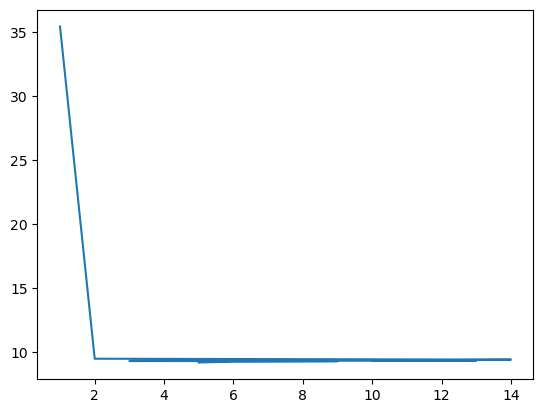

In [ ]:
import matplotlib.pyplot as plt
plt.plot(a2 ,a1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = []
for i in range(5,50):
    kmeans = MiniBatchKMeans(n_clusters=i)
    kmeans.fit(tf_x_train.toarray().astype(float))
    preds = kmeans.predict(tf_x_valid.toarray().astype(float))
    preds = preds//5
    accuracy.append((accuracy_score(Y_valid.array, preds.astype(int)),i))



KeyboardInterrupt: 

In [ ]:
print(accuracy[-3])

(0.4263672321924749, 37)


In [ ]:
kmeans = MiniBatchKMeans(n_clusters=8)
kmeans.fit(normalized_arr.toarray().astype(float))
kmeans.transform(normalized_arr.toarray().astype(float))
preds = kmeans.predict(normalized_var.toarray().astype(float))
preds = preds//5
print(accuracy_score(Y_valid.array, preds.astype(int)))

0.09734571129707113


In [ ]:
new_x_train_features = kmeans.fit_transform(normalized_arr).astype(float)
new_x_valid_features = kmeans.fit_transform(normalized_var).astype(float)

In [ ]:
print(new_x_train_features*1000)

[[1411.49286041 1414.13130179 1407.10501085 ... 1413.31009462
  1412.77136282 1414.21356237]
 [1411.49286041 1414.13130179 1407.10501085 ... 1413.31009462
  1412.77136282 1414.21356237]
 [1411.49286041 1414.13130179 1407.10501085 ... 1413.31009462
  1412.77136282 1414.21356237]
 ...
 [1411.49286041 1414.13130179 1407.10501085 ... 1413.31009462
  1412.77136282 1414.21356237]
 [1411.49286041 1414.13130179 1407.10501085 ... 1413.31009462
  1412.77136282 1414.21356237]
 [1411.49286041 1414.13130179 1407.10501085 ... 1413.31009462
  1412.77136282 1414.21356237]]


In [1]:
import torch
import torch.nn as nn
# Define the number of input features
K = 37

# Define the first linear layer
linear_layer1 = nn.Linear(K, 16)

# Define the second linear layer
linear_layer2 = nn.Linear(16, 5)

# Print the two linear layers
print(linear_layer1)
print(linear_layer2)

model = torch.nn.Sequential(
    linear_layer1,
    torch.nn.Linear(),
    linear_layer2,
    torch.nn.Sigmoid()
)

Y_tensor = torch.tensor(Y_train.array/4).long()
X_tensor = torch.tensor(new_x_train_features).float()

#print(X_tensor.shape)
# make a dataset object
data = torch.utils.data.TensorDataset(X_tensor, Y_tensor)

# then use it to make a dataloader object
loader = torch.utils.data.DataLoader(data, batch_size=32, shuffle=True)

# make a scoring function
scorer = torch.nn.NLLLoss()

opt = torch.optim.Adam( model.parameters(), 0.0001   )

num_epochs = 70
for j in range(num_epochs):
    for batch in loader:
        # unpack data
        batchX = batch[0]

        batchY = batch[1]

        #print(batchY.shape)
        # zero out last run 
        opt.zero_grad

        # get the predicitions
        preds = model(batchX)
     
        # get the error
        #print(preds.shape)
        err = scorer(preds, batchY)
        
        # send the gradient information to the parameters
        err.backward()

        # take the step
        opt.step()

preds = model(X_tensor).detach().numpy()
print(preds)

#plt.scatter(trainX[:,0], trainX[:, 1], c=pred_labels)

Linear(in_features=37, out_features=16, bias=True)
Linear(in_features=16, out_features=5, bias=True)


TypeError: Linear.__init__() missing 2 required positional arguments: 'in_features' and 'out_features'

In [ ]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
embedding_size=32
model= Sequential()
model.add(Embedding(5000, embedding_size, input_length=500))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

In [ ]:
model.fit(new_x_train_features, Y_train.array, validation_data=(new_x_valid_features, Y_valid.array/4), batch_size=36, epochs=20)

AttributeError: module 'numpy' has no attribute 'toarray'